### LIBRARY

In [ ]:
import pandas as pd          # IMPORTS THE PANDAS LIBRARY FOR DATA HANDLING AND ANALYSIS
import numpy as np           # IMPORTS NUMPY FOR NUMERICAL OPERATIONS
import matplotlib.pyplot as plt  # IMPORTS MATPLOTLIB FOR DATA VISUALIZATION AND PLOTTING

### DATA READING

In [16]:
FAKE_PATH = "../DATA/FAKE.csv"        # DEFINES THE FILE PATH TO THE FAKE NEWS CSV FILE
TRUE_PATH = "../DATA/TRUE.csv"        # DEFINES THE FILE PATH TO THE TRUE NEWS CSV FILE

fake_df = pd.read_csv(FAKE_PATH)      # READS THE FAKE NEWS CSV INTO A PANDAS DATAFRAME NAMED fake_df
true_df = pd.read_csv(TRUE_PATH)      # READS THE TRUE NEWS CSV INTO A PANDAS DATAFRAME NAMED true_df

In [17]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


### ADD LABELS

In [19]:
fake_df["label"] = 0      # ADDS A NEW COLUMN 'label' TO fake_df AND ASSIGNS 0 TO INDICATE FAKE NEWS
true_df["label"] = 1      # ADDS A NEW COLUMN 'label' TO true_df AND ASSIGNS 1 TO INDICATE TRUE NEWS

In [ ]:
fake_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [13]:
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


### MERGE DATASETS

In [170]:
df = pd.concat([fake_df, true_df], axis=0)      # COMBINES fake_df AND true_df VERTICALLY INTO ONE DATAFRAME df
df = df.reset_index(drop=True)                  # RESETS THE INDEX OF df AND DROPS THE OLD INDEX COLUMN

### SHUFFLE DATA

In [171]:
df = df.sample(frac=1.0, random_state=42)       # RANDOMLY SHUFFLES ALL ROWS IN df TO AVOID ORDER BIAS
df = df.reset_index(drop=True)                  # RESETS THE INDEX AGAIN AFTER SHUFFLING

In [172]:
print(f"SHAPE --> {df.shape}")   # PRINTS THE NUMBER OF ROWS AND COLUMNS IN THE DATAFRAME

print("\nHEAD -->")          # PRINTS A HEADING TO INDICATE PREVIEW OF FIRST 5 ROWS

print(df.head())                # DISPLAYS THE FIRST 5 ROWS OF THE DATAFRAME

SHAPE --> (44898, 5)

HEAD -->
                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      0  
1       April 5, 2017       1  
2  September 27, 2017       1  
3         May 22, 2017      0  
4       June 24, 2016       1  


In [173]:
df.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


### DATA INSPECTION

In [175]:
y = df.label  # EXTRACTS THE LABEL COLUMN (0 = FAKE, 1 = REAL)
print('RATIO OF REAL AND FAKE NEWS') 

(
    y.value_counts(normalize=True)  # RETURNS PROPORTION (RATIO) OF EACH CLASS
    .rename({1: 'REAL', 0: 'FAKE'})  # RENAMES VALUES TO MAKE THE OUTPUT HUMAN-READABLE
)

RATIO OF REAL AND FAKE NEWS


label
FAKE    0.522985
REAL    0.477015
Name: proportion, dtype: float64

In [177]:
print("\nCOLUMN NAMES")

# DISPLAYS EACH COLUMN NAME 
for col in df.columns:
    print(f"  - {col}") 


COLUMN NAMES
  - title
  - text
  - subject
  - date
  - label


In [178]:
print("\nNULL VALUE PER COLUMNS -->")           

print(df.isnull().sum())                        # DISPLAYS THE NUMBER OF NULL VALUES IN EACH COLUMN

print("\nNUMBER OF DUPLICATE ROWS -->")     

print(df.duplicated().sum())                    # DISPLAYS THE TOTAL NUMBER OF DUPLICATE ROWS

print("\nUNIQUE 'SUBJECTS' -->", df['subject'].unique())  # PRINTS ALL UNIQUE SUBJECT CATEGORIES IN THE 'subject' COLUMN

print("DATE RANGE --> ", df['date'].min(), "→", df['date'].max())  # PRINTS THE EARLIEST AND LATEST DATES IN THE 'date' COLUMN


NULL VALUE PER COLUMNS -->
title      0
text       0
subject    0
date       0
label      0
dtype: int64

NUMBER OF DUPLICATE ROWS -->
209

UNIQUE 'SUBJECTS' --> ['US_News' 'politicsNews' 'News' 'Government News' 'left-news' 'worldnews'
 'politics' 'Middle-east']
DATE RANGE -->  14-Feb-18 → https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg


In [ ]:
# COUNTS THE TOTAL NUMBER OF DUPLICATE ROWS IN THE DATAFRAME
duplicate_count = df.duplicated().sum()
print(f"TOTAL DUPLICATE ROWS FOUND: {duplicate_count}")

# CHECKS IF THERE ARE ANY DUPLICATE ROWS
if duplicate_count > 0:
    print("\nSAMPLE DUPLICATE ROWS:")
    display(df[df.duplicated()].head())
    
else:
    print("NO DUPLICATES PRESENT IN THE DATAFRAME.")

TOTAL DUPLICATE ROWS FOUND: 209

SAMPLE DUPLICATE ROWS:


,title,text,subject,date,label
4106,Islamic State claims responsibility for Aden c...,CAIRO (Reuters) - Militant group Islamic State...,worldnews,"November 29, 2017",1
5547,Turkey seeks life sentences for 60 ex-military...,ISTANBUL (Reuters) - Sixty people including a ...,worldnews,"December 21, 2017",1
5909,Highlights: The Trump presidency on March 31 a...,(Reuters) - Highlights of the day for U.S. Pre...,politicsNews,"March 31, 2017",1
6382,Britain preparing to transfer 400 million poun...,LONDON (Reuters) - Britain is preparing to tra...,worldnews,"November 16, 2017",1
6779,Israel ambassador asks to meet New Zealand pop...,WELLINGTON (Reuters) - Israel s ambassador to ...,worldnews,"December 27, 2017",1


In [180]:
# CHECK FOR MOST FREQUENT DUPLICATE TITLES
print("\nTOP 10 REPEATED TITLES:")
print(df['title'].value_counts().head(10))


TOP 10 REPEATED TITLES:
title
Factbox: Trump fills top jobs for his administration                                                     14
Factbox: Contenders for senior jobs in Trump's administration                                             8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                          8
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead     6
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                 6
Highlights: The Trump presidency on March 31 at 6:19 p.m. EDT                                             5
Highlights: The Trump presidency on April 21 at 6:12 p.m. EDT/2212 GMT                                    5
Factbox: Contenders, picks for key jobs in Trump's administration                                         5
Factbox: Why the Zika virus is causing alarm                                                             

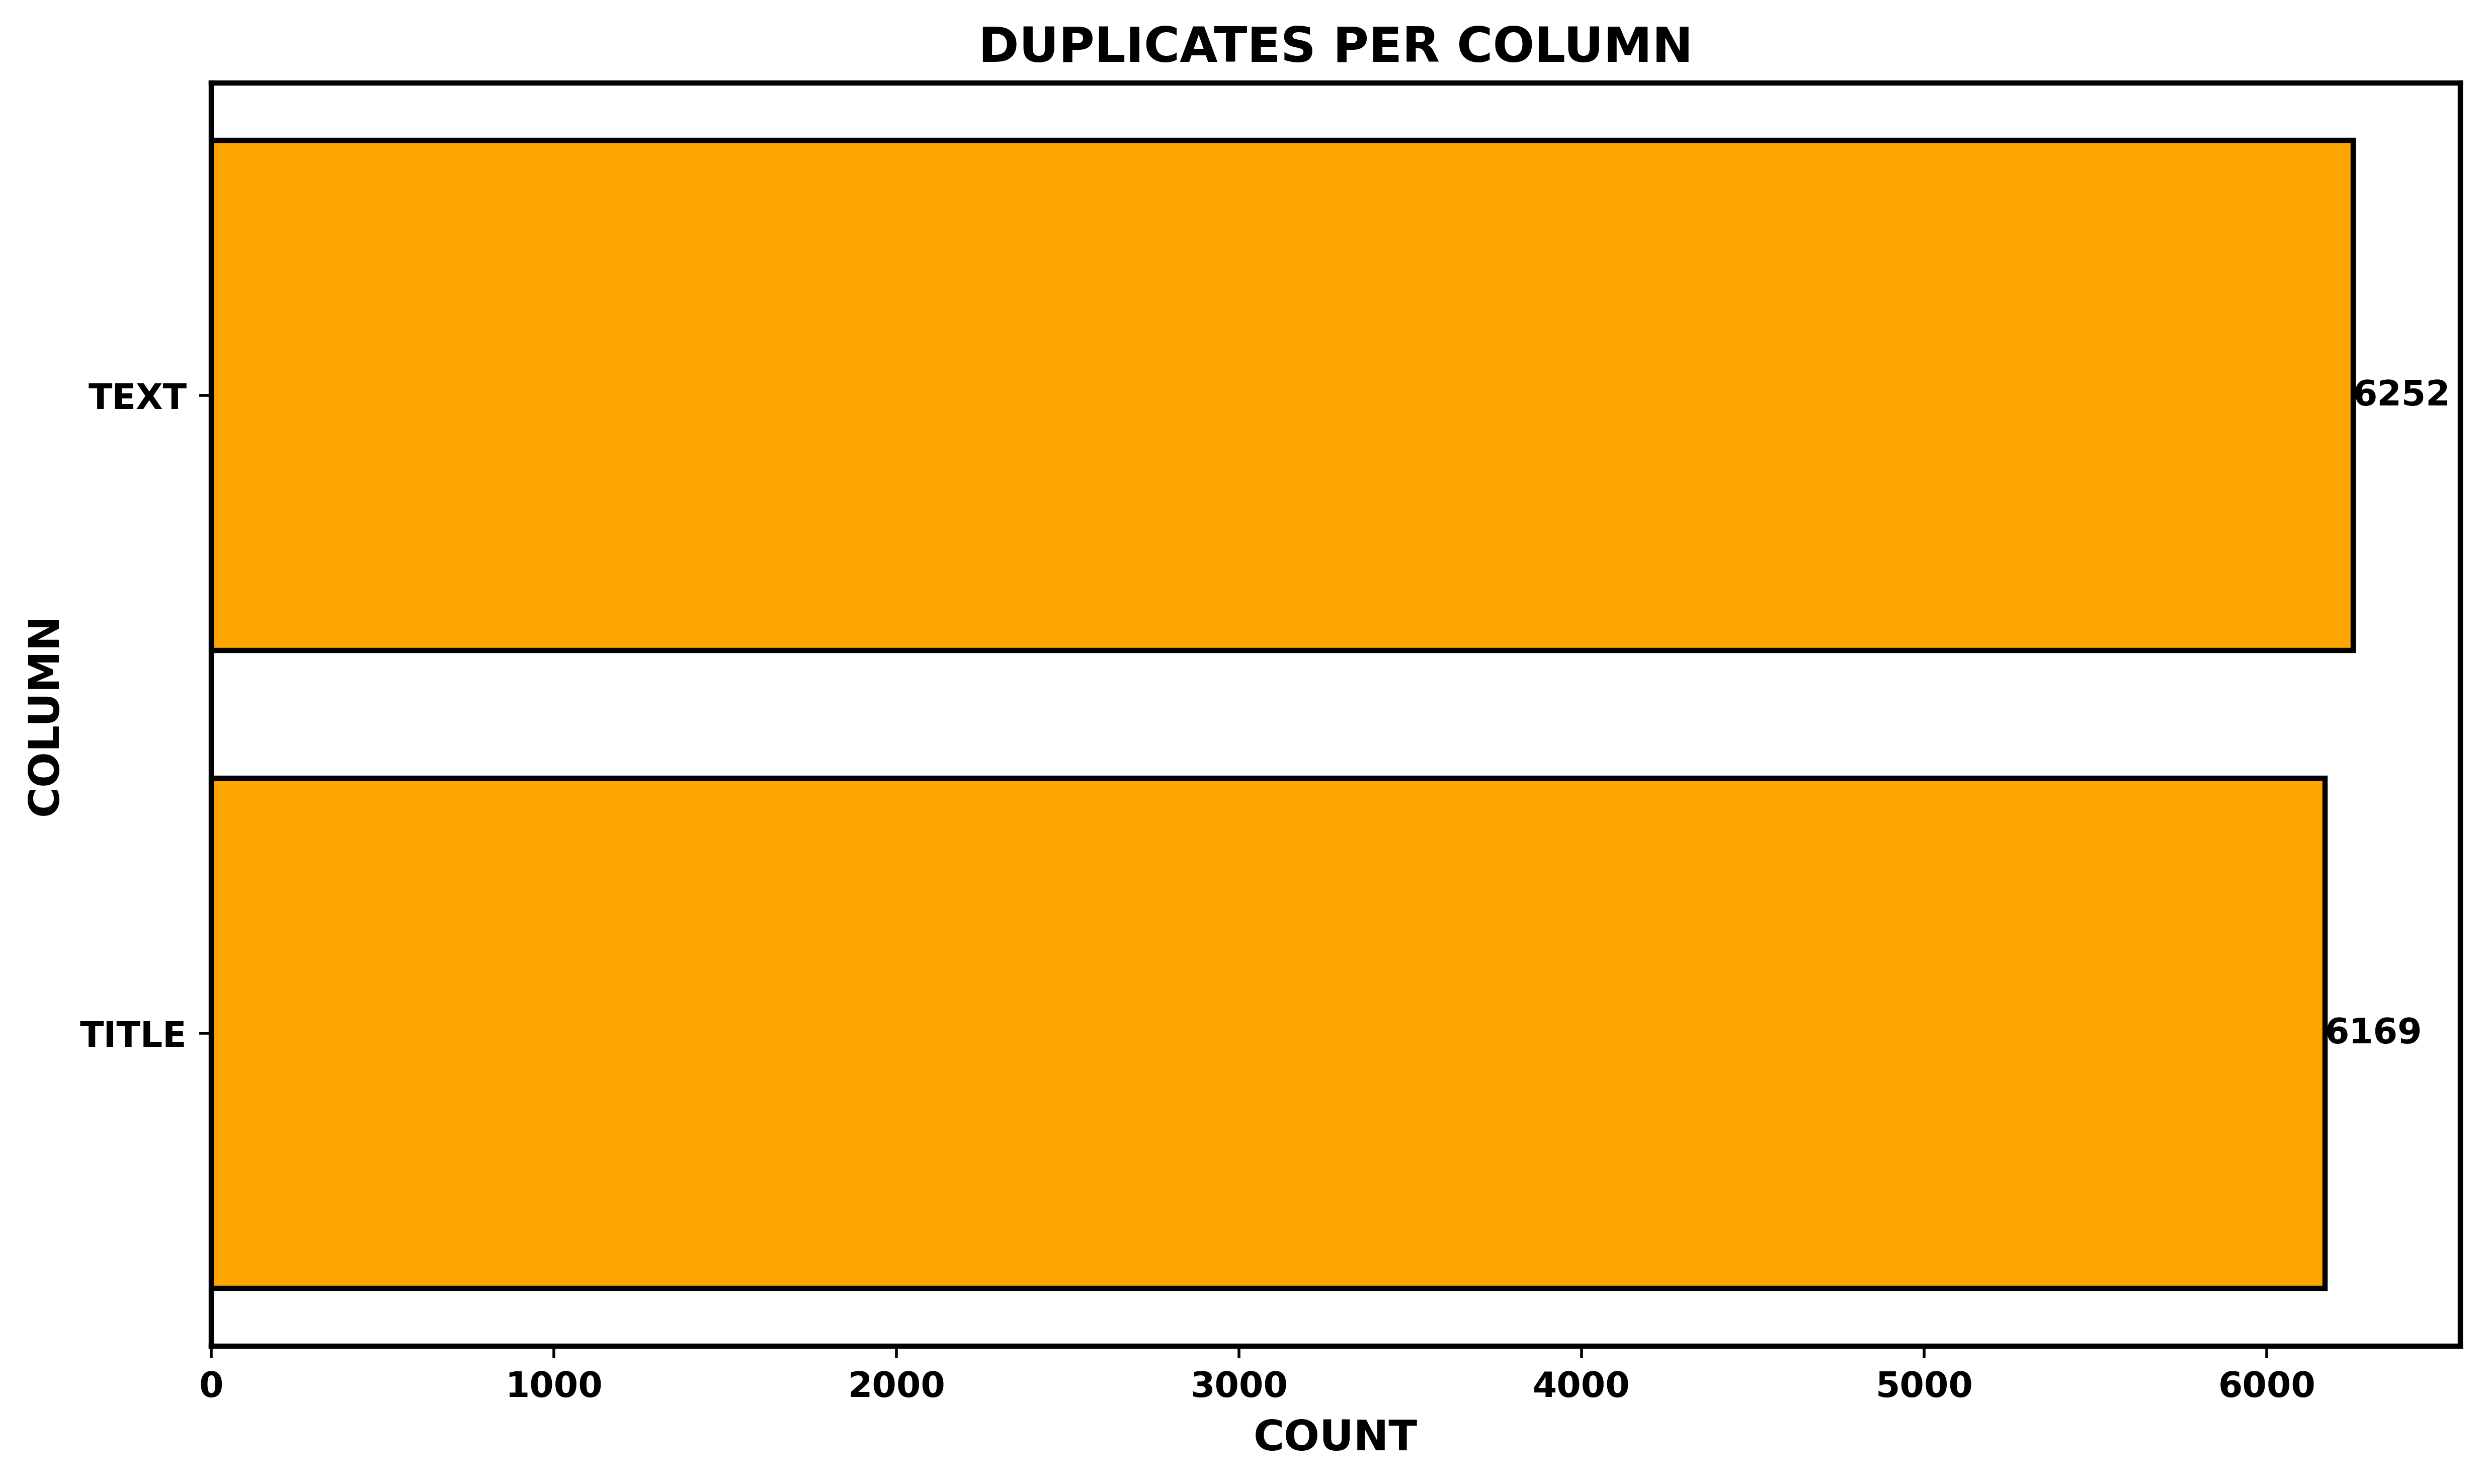

In [ ]:
# COUNT DUPLICATES IN 'TITLE' COLUMN
title_duplicates = df['title'].duplicated().sum()

# COUNT DUPLICATES IN 'TEXT' COLUMN
text_duplicates = df['text'].duplicated().sum()

# CREATE A FIGURE WITH SPECIFIED SIZE
plt.figure(figsize=(10, 6), dpi=500)

# CREATE HORIZONTAL BAR PLOT WITH ORANGE BARS AND BLACK EDGES
bars = plt.barh(['TITLE', 'TEXT'], [title_duplicates, text_duplicates], 
                color='orange', edgecolor='black', linewidth=1.5)

# SET THE TITLE WITH BOLD FONT AND HIGH CONTRAST COLOR
plt.title("DUPLICATES PER COLUMN", fontsize=14, fontweight='bold', color='black')

# SET X-AXIS LABEL WITH BOLD FONT
plt.xlabel("COUNT", fontsize=12, fontweight='bold', color='black')

# SET Y-AXIS LABEL WITH BOLD FONT
plt.ylabel("COLUMN", fontsize=12, fontweight='bold', color='black')

# SET FONT STYLE FOR TICK LABELS TO BOLD AND BLACK
plt.xticks(fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')

# MAKE PLOT BORDERS (SPINES) BOLD AND BLACK
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('black')

# ADD DUPLICATE COUNTS NEXT TO EACH BAR WITH BOLD, HIGH-CONTRAST TEXT
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             str(int(width)),
             va='center', fontsize=10, fontweight='bold', color='black')

# ADJUST LAYOUT TO AVOID CLIPPING
plt.tight_layout()

# DISPLAY THE FINAL PLOT
plt.show()

# CLEAN 'SUBJECTS'

### SUBJECT DISTRIBUTION

In [160]:
# CHECK UNIQUE SUBJECTS
print("UNIQUE SUBJECTS -->", df['subject'].unique())

# COUNT VALUES PER SUBJECT
print("\nSUBJECT DISTRIBUTION -->\n", df['subject'].value_counts())

UNIQUE SUBJECTS --> ['US_News' 'politicsNews' 'News' 'Government News' 'left-news' 'worldnews'
 'politics' 'Middle-east']

SUBJECT DISTRIBUTION -->
 subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


### MAPPING

In [161]:
# DEFINE A SUBJECT MAPPING DICTIONARY
subject_mapping = {
    'politicsNews': 'politics',
    'Government News': 'politics',
    'US_News': 'domestic',
    'worldnews': 'world',
    'left-news': 'left-wing',
    'News': 'general',
    'politics': 'politics',       
    'Middle-east': 'middle-east'  
}

# APPLY MAPPING TO 'subject' COLUMN
df['subject'] = df['subject'].map(subject_mapping)

# CHECK REMAPPED VALUES
print("MAPPED SUBJECTS --> \n", df['subject'].value_counts(dropna=False))

# CHECK UNIQUE SUBJECTS
print("UNIQUE SUBJECTS -->", df['subject'].unique())

print("\nCHECK FOR NULLS IN SUBJECT COLUMN:")
print(df['subject'].isnull().sum())

MAPPED SUBJECTS --> 
 subject
politics       19683
world          10145
general         9050
left-wing       4459
domestic         783
middle-east      778
Name: count, dtype: int64
UNIQUE SUBJECTS --> ['domestic' 'politics' 'general' 'left-wing' 'world' 'middle-east']

CHECK FOR NULLS IN SUBJECT COLUMN:
0


In [ ]:
# DIMENSIONS OF THE DATAFRAME (NUMBER OF ROWS AND COLUMNS)
print(f"SHAPE --> {df.shape}")

# SUMMARY OF THE DATAFRAME INCLUDING COLUMN NAMES, NON-NULL COUNTS, AND DATA TYPES
print(df.info())

# RANDOM SAMPLE OF 5 ROWS FROM THE DATAFRAME
print(df.sample(5))

SHAPE --> (44898, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None
                                                   title  \
31774   EXPLOSIVE New Report PROVES Trump Hotel Linke...   
36139  Trump administration may seek NAFTA currency p...   
30666   WATCH: MSNBC Host TORCHES Trump Campaign Mana...   
1830    Ann Coulter: Trump Doesn’t Need GOP’s Support...   
1202   Vietnam court jails blogger for seven years fo...   

                                                    text   subject  \
31774  Donald Trump likes to talk tough on terror. Ho...   general   
36139  WASHINGTON (Reuters) - U.S. Treasury Secretary...

### CLEAN 'DATE'

In [163]:
# MAKE A COPY OF THE ORIGINAL DATAFRAME
df_copy = df.copy()

# CHECK SAMPLE VALUES IN 'date' COLUMN
print(df_copy['date'].sample(10))  

# CONVERT TO DATETIME IN THE COPY
df_copy['date_converted'] = pd.to_datetime(df_copy['date'], errors='coerce')

# CHECK HOW MANY FAILED TO CONVERT
invalid_dates = df_copy['date_converted'].isnull().sum()
print(f"INVALID DATES FOUND --> {invalid_dates}")

# DISPLAY THOSE INVALID DATES
print(df_copy[df_copy['date_converted'].isnull()][['date', 'title']].head())

# REMOVE ROWS WITH INVALID DATES 
df_copy = df_copy[~df_copy['date_converted'].isnull()].reset_index(drop=True)

# DISPLAY DATE RANGE
print("DATE RANGE -->", df_copy['date_converted'].min(), "→", df_copy['date_converted'].max())

20724     December 8, 2017 
11526        March 8, 2017 
34817    September 5, 2017 
42767          Aug 19, 2017
17007          Dec 21, 2016
24073     September 5, 2017
12998     December 16, 2016
20964        March 9, 2017 
35041         June 30, 2016
5567            Oct 4, 2016
Name: date, dtype: object
INVALID DATES FOUND --> 33030
                  date                                              title
1       April 5, 2017   Trump drops Steve Bannon from National Securit...
2  September 27, 2017   Puerto Rico expects U.S. to lift Jones Act shi...
4       June 24, 2016   Donald Trump heads for Scotland to reopen a go...
6         Feb 19, 2017  AWESOME! DIAMOND AND SILK Rip Into The Press: ...
7          Mar 8, 2016  STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...
DATE RANGE --> 2015-05-01 00:00:00 → 2017-12-31 00:00:00


In [ ]:
# SHAPE OF ORIGINAL DATAFRAME 
print(f"DF SHAPE --> {df.shape}")

# SHAPE OF COPIED DATAFRAME 
print(f"DF_COPY SHAPE --> {df_copy.shape}")

DF SHAPE --> (44689, 5)
DF_COPY SHAPE --> (11868, 6)


### REMOVE DUPLICATES

In [ ]:
# NUMBER OF DUPLICATE ROWS IN THE DATAFRAME
print("\nNUMBER OF DUPLICATE ROWS -->")     

# COUNT OF DUPLICATE ROWS IN THE DATAFRAME
print(df.duplicated().sum())


NUMBER OF DUPLICATE ROWS -->
1246


In [ ]:
# REMOVE DUPLICATE ROWS COMPLETELY
df = df.drop_duplicates()

# RESET INDEX AFTER REMOVAL
df = df.reset_index(drop=True)

In [ ]:
# SHAPE OF THE DATAFRAME (ROWS AND COLUMNS)
print("DATAFRAME SHAPE -->", df.shape)

# NUMBER OF REMAINING DUPLICATE ROWS IN THE DATAFRAME
print("REMAINING DUPLICATES -->", df.duplicated().sum())

# CHECK FOR NULL VALUES IN EACH COLUMN OF THE DATAFRAME
print("\nCHECK FOR NULL VALUES -->")
print(df.isnull().sum())

# COUNT OF UNIQUE VALUES IN THE 'subject' COLUMN AFTER CLEANUP
print("\nUNIQUE SUBJECT VALUES AFTER CLEANUP --> ")
print(df['subject'].value_counts(dropna=False))

# DATE RANGE IN THE 'date_converted' COLUMN
print("\nDATE RANGE IN 'date_converted' -->")
print(df_copy['date_converted'].min(), "TO", df_copy['date_converted'].max())

DATAFRAME SHAPE --> (43652, 5)
REMAINING DUPLICATES --> 0

CHECK FOR NULL VALUES -->
title      0
text       0
subject    0
date       0
label      0
dtype: int64

UNIQUE SUBJECT VALUES AFTER CLEANUP --> 
subject
politics       18591
world           9991
general         9050
left-wing       4459
domestic         783
middle-east      778
Name: count, dtype: int64

DATE RANGE IN 'date_converted' -->
2015-05-01 00:00:00 TO 2017-12-31 00:00:00


### DATA CLEANING AND PREPARATION FOR MODELING

In [194]:
# DROP RAW DATE COLUMN AS IT IS NOT REQUIRED FOR MODELING
df.drop(columns=['date'], inplace=True)

# CREATE A MODELING DATAFRAME WITH ONLY REQUIRED COLUMNS: TEXT (FEATURE) AND LABEL (TARGET)
df_model = df[['text', 'label']].copy()

In [195]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44689 non-null  object
 1   label   44689 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 698.4+ KB


### REMOVING DUPLICATE RECORDS FROM MODELING DATA

In [ ]:
# COUNT THE NUMBER OF DUPLICATE ROWS IN THE MODELING DATAFRAME
df_model.duplicated().sum()

np.int64(6042)

In [ ]:
# REMOVE DUPLICATE ROWS FROM THE MODELING DATAFRAME IN PLACE
df_model.drop_duplicates(inplace=True)

# VERIFY THAT NO DUPLICATE ROWS REMAIN AFTER REMOVAL
df_model.duplicated().sum()

np.int64(0)

# NLP TEXT CLEANING & PREPROCESSING

### LIBRARY

In [248]:
import re                               # FOR REGULAR EXPRESSION-BASED TEXT CLEANING
import string                           # FOR PUNCTUATION CONSTANTS
from nltk.corpus import stopwords       # FOR STOPWORD REMOVAL
from nltk.tokenize import word_tokenize # FOR WORD TOKENIZATION
from nltk.stem import WordNetLemmatizer # FOR LEMMATIZATION
from tqdm import tqdm                   # FOR PROGRESS BAR DURING CLEANING

# LOAD NLTK RESOURCES
import nltk
nltk.download('punkt')                  # TOKENIZER MODEL
nltk.download('stopwords')              # ENGLISH STOPWORDS
nltk.download('wordnet')                # WORDNET LEMMATIZER
nltk.download('omw-1.4')                # LEMMATIZER SUPPORT FILES

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [251]:
sample_text = "I'M DaRkSoul!"
tokens = word_tokenize(sample_text)
print(tokens)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\KIIT/nltk_data'
    - 'c:\\FAKE NEWS DETECTION\\VENV\\nltk_data'
    - 'c:\\FAKE NEWS DETECTION\\VENV\\share\\nltk_data'
    - 'c:\\FAKE NEWS DETECTION\\VENV\\lib\\nltk_data'
    - 'C:\\Users\\KIIT\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\KIIT\\AppData\\Roaming\\nltk_data'
    - 'C:\\Users\\KIIT\\AppData\\Roaming\\nltk_data'
    - 'C:\\Users\\KIIT\\AppData\\Roaming\\nltk_data'
    - 'C:\\Users\\KIIT\\AppData\\Roaming\\nltk_data'
    - 'C:\\Users\\KIIT\\AppData\\Roaming\\nltk_data'
    - 'C:\\Users\\KIIT\\AppData\\Roaming\\nltk_data'
    - 'C:\\Users\\KIIT\\AppData\\Roaming\\nltk_data'
    - 'C:\\Users\\KIIT\\AppData\\Roaming\\nltk_data'
**********************************************************************


### TEXT CLEANING FUNCTION

In [ ]:
# INITIALIZE STOPWORDS AND LEMMATIZER
stop_words = set(stopwords.words('english'))               # LOAD ENGLISH STOPWORDS AS A SET
lemmatizer = WordNetLemmatizer()                           # CREATE LEMMATIZER INSTANCE

def clean_text(text):
    """
    CLEAN AND PREPROCESS RAW TEXT USING STANDARD NLP STEPS.
    
    STEPS:
    1. LOWERCASE CONVERSION
    2. REMOVAL OF URLS, DIGITS, PUNCTUATION
    3. TOKENIZATION
    4. STOPWORD REMOVAL
    5. LEMMATIZATION
    
    PARAMETERS:
    text (str): INPUT RAW TEXT
    
    RETURNS:
    str: CLEANED TEXT STRING
    """
    if pd.isnull(text):
        return ""
    
    # CONVERT TEXT TO LOWERCASE
    text = text.lower()
    
    # REMOVE URLS
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # REMOVE PUNCTUATION
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # REMOVE DIGITS
    text = re.sub(r'\d+', '', text)
    
    # TOKENIZE TEXT INTO WORDS
    tokens = word_tokenize(text)
    
    # REMOVE STOPWORDS AND SHORT TOKENS, THEN LEMMATIZE
    cleaned_tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and len(word) > 2
    ]
    
    # JOIN TOKENS BACK TO SINGLE STRING
    return ' '.join(cleaned_tokens)

### APPLY TEXT CLEANING TO DATASET

In [ ]:
# APPLY TEXT CLEANING TO THE 'text' COLUMN AND STORE IN 'clean_text'
tqdm.pandas(desc="CLEANING TEXT")
df_model['clean_text'] = df_model['text'].progress_apply(clean_text)

In [ ]:
# EXPORT CLEANED DATA TO CSV 
df_model.to_csv("../DATA/DATA.csv", index=False)

# DISPLAY FIRST 5 CLEANED RECORDS
df_model[['text', 'clean_text', 'label']].head()